In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [3]:
!pip install kaggle

In [3]:
kaggle_cred= json.load(open("kaggle.json"))

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_cred["username"]
os.environ['KAGGLE_KEY'] = kaggle_cred["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [6]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [7]:
base_dir= 'plantvillage dataset/color'

(256, 256, 3)


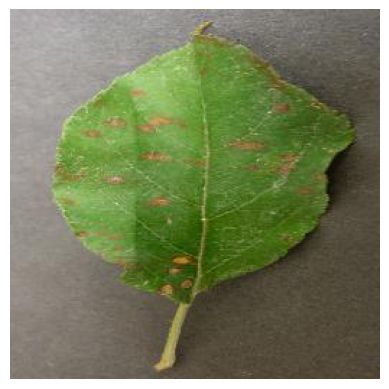

In [8]:
image_path= 'plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
img_size=224
batch_size=32

In [10]:
data_gen = ImageDataGenerator(
rescale=1./255,
validation_split=0.2
)

In [11]:
train_generator= data_gen.flow_from_directory(
base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [12]:
validation_generator= data_gen.flow_from_directory(
base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [13]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(img_size, img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history= model.fit(
train_generator,
steps_per_epoch=train_generator.samples // batch_size,
epochs=5,
validation_data=validation_generator,
validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5


1358/1358 [==============================] - 929s 683ms/step - loss: 0.9478 - accuracy: 0.7405 - val_loss: 0.4578 - val_accuracy: 0.8548
Epoch 2/5
1358/1358 [==============================] - 892s 657ms/step - loss: 0.2720 - accuracy: 0.9139 - val_loss: 0.3984 - val_accuracy: 0.8781
Epoch 3/5
1358/1358 [==============================] - 892s 657ms/step - loss: 0.1278 - accuracy: 0.9574 - val_loss: 0.4180 - val_accuracy: 0.8838
Epoch 4/5
1358/1358 [==============================] - 987s 727ms/step - loss: 0.0880 - accuracy: 0.9717 - val_loss: 0.4851 - val_accuracy: 0.8721
Epoch 5/5
1358/1358 [==============================] - 923s 680ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.5255 - val_accuracy: 0.8771


In [17]:
# model evaluation
print("Evaluating model...")
val_loss, val_accuracy= model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Evaluating model...
339/339 [==============================] - 53s 155ms/step - loss: 0.5254 - accuracy: 0.8772
Validation Accuracy: 87.72%


<function matplotlib.pyplot.show(close=None, block=None)>

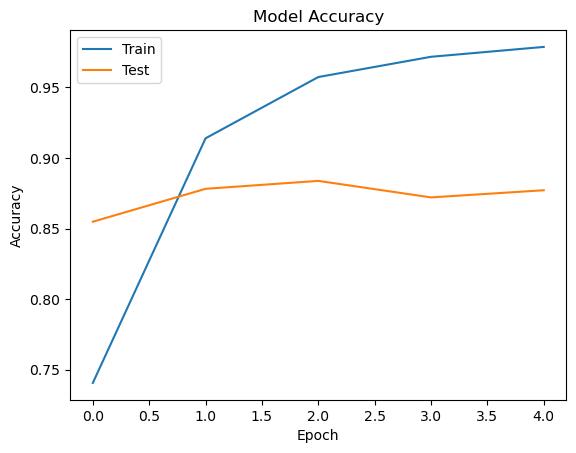

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

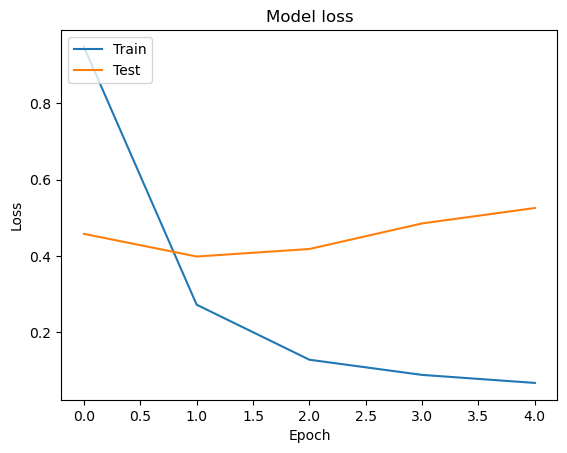

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show

In [19]:
def load_and_preprocess_image(image_path, target_size=(224,224)):
    img = Image.open(image_path)
    img=img.resize(target_size)
    img_array= np.array(img)
    img_array= np.expand_dims(img_array, axis=0)
    img_array= img_array.astype('float32')/255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img= load_and_preprocess_image(image_path)
    pred=model.predict(preprocessed_img)
    pred_class_index= np.argmax(pred, axis=1)[0]
    pred_class_name= class_indices[pred_class_index]
    return pred_class_name

In [20]:
class_indices={v:k for k, v in train_generator.class_indices.items()}

In [21]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [22]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [27]:
image_path='plantvillage dataset/color/Tomato___Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG'
pred_class_name= predict_image_class(model, image_path, class_indices)
print("Predicted Class Name: ", pred_class_name)

1/1 [==============================] - 0s 113ms/step
Predicted Class Name:  Tomato___Septoria_leaf_spot


In [33]:
model.save('Plant_disease_prediction_model.h5')